In [172]:
import pandas as pd
import numpy as np


In [173]:
df_complete = pd.read_json('./bikez/data.json')
# strip all values in the DataFrame
df_complete = df_complete.map(lambda x: x.strip() if isinstance(x, str) else x)

df_complete

,model,brand,year,profile,specs
0,GTBO 600 Daytona-VI,Acabion,2011,The Acabion provides an increase of + 1 000 % ...,"{'': '', 'Model': 'Acabion GTBO 600 Daytona-VI..."
1,GTBO 55,Acabion,2007,We start our enterprise with the most exclusiv...,"{'': '', 'Model name': 'Acabion GTBO 55', 'Yea..."
2,GTBO 70,Acabion,2007,Acabion is a global project. The rule is simpl...,"{'': '', 'Motorcycle name': 'Acabion GTBO 70',..."
3,GTBO 600 Daytona-VI,Acabion,2021,The Acabion provides an increase of + 1 000 % ...,"{'': '', 'Model': 'Acabion GTBO 600 Daytona-VI..."
4,Da Vinci 650-VI,Acabion,2011,All it´s road relevant characteristics were de...,"{'': '', 'Motorcycle name': 'Acabion Da Vinci ..."
...,...,...,...,...,...
15548,E-Lite,Avon,2012,"Triple mode power, Manual, Motor and pedal a...","{'': '', 'Model name': 'Avon E-Lite', 'Year of..."
15549,E-Scoot,Avon,2011,NaN,"{'': '', 'Motorcycle name': 'Avon E-Scoot', 'Y..."
15550,KHB 250,Barossa,2009,NaN,"{'': '', 'Model name': 'Barossa KHB 250', 'Yea..."
15551,AL5,Barossa,2009,NaN,"{'': '', 'Motorcycle name': 'Barossa AL5', 'Ye..."


In [174]:
df_specs = pd.DataFrame.from_dict(df_complete['specs'].to_dict()).T
df_specs = df_specs.filter(regex='^(?!.*Rating)')
df_specs = df_specs.filter(regex='^(?!.*Price)')

for column in df_specs.columns:
    print(column, df_specs[column].nunique())

 1
Model 4205
Year 121
Category 19
Engine type 26
Engine details 844
Power 1428
Top speed 291
Max RPM 37
Cooling system 4
Frame type 1251
Front brakes 887
Rear brakes 666
Dry weight 935
Power/weight ratio 2173
Overall height 427
Overall length 672
Overall width 437
Starter 4
Comments 3597
Update specs 1
Insurance costs 1
Parts finder 2
Maintenance 1
Ask questions 15552
Related bikes 1
Model name 4124
Displacement 795
Torque 1684
Bore x stroke 1026
Valves per cylinder 9
Fuel system 1070
Gearbox 13
Fuel consumption 199
Greenhouse gases 199
Motorcycle name 4157
Year of manufacture 119
Type 19
Engine size 783
Type of engine 25
Output 1418
Color options 3891
Maximum RPM 31
Year model 118
Effect 1417
Transmission type 4
Front tire 662
Rear tire 824
Driveline 537
Emission details 116
Wheels 1067
Seat 197
Fuel capacity 350
Reserve fuel capacity 56
Exhaust system 589
Front suspension 1989
Rear suspension 2141
Ignition 497
Seat height 281
Wheelbase 523
Clutch 711
Model year 119
Power output 1429

In [175]:
df_specs = df_specs.replace('', np.nan)
df_specs = df_specs.replace('Loading...', np.nan)

# non-NaN values at each column
for column in df_specs.columns:
    print(column, df_specs[column].count())

 0
Model 5240
Year 3942
Category 7766
Engine type 7763
Engine details 2646
Power 2839
Top speed 6110
Max RPM 121
Cooling system 13010
Frame type 6635
Front brakes 14631
Rear brakes 14605
Dry weight 10718
Power/weight ratio 7689
Overall height 7008
Overall length 9239
Overall width 7748
Starter 11774
Comments 7566
Update specs 15552
Insurance costs 13864
Parts finder 13864
Maintenance 15552
Ask questions 15552
Related bikes 15552
Model name 5147
Displacement 7236
Torque 6187
Bore x stroke 8841
Valves per cylinder 3621
Fuel system 11115
Gearbox 11895
Fuel consumption 1840
Greenhouse gases 1840
Motorcycle name 5165
Year of manufacture 3812
Type 7633
Engine size 7082
Type of engine 7631
Output 2674
Color options 10577
Maximum RPM 95
Year model 3900
Effect 2723
Transmission type 12180
Front tire 12558
Rear tire 12561
Driveline 2693
Emission details 1650
Wheels 4298
Seat 2640
Fuel capacity 11281
Reserve fuel capacity 1058
Exhaust system 2192
Front suspension 11003
Rear suspension 10627
Ignit

C:\Users\jemen\AppData\Local\Temp\ipykernel_19760\1449222137.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_specs = df_specs.replace('', np.nan)


In [176]:
def process_columns(df, main_column, columns_to_merge):
    df[columns_to_merge] = df[columns_to_merge].fillna('')
    df[main_column] = df[columns_to_merge].agg(' '.join, axis=1)
    df = df.drop(columns_to_merge[1:], axis=1)
    return df


columns_to_process = [
    ('Model', ['Model', 'Model name', 'Motorcycle name']),
    ('Year', ['Year', 'Year of manufacture', 'Year model', 'Model year']),
    ('Category', ['Category', 'Type']),
    ('Power', ['Power', 'Output', 'Power output', 'Effect']),
    ('Engine type', ['Engine type', 'Type of engine']),
    ('Displacement', ['Displacement', 'Engine size'])
]

for main_column, columns_to_merge in columns_to_process:
    df_specs = process_columns(df_specs, main_column, columns_to_merge)

df_specs.drop(columns=['Service interval', 'Comments', 'Modifications compared to previous model', 'Seat',
                       'Oil filter', 'Belt teeth', 'Belt width', 'Pulley teeth', '', 'Battery', '1/4 mile (0.4 km)',
                       'Chain links', 'Chain size', 'Spark plugs', 'Coolant', 'Brake fluid', 'Engine oil', 
                       'Rear percentage of weight', 'Front percentage of weight', 'Update specs', 'Insurance costs',
                       'Parts finder', 'Ask questions', 'Related bikes', '60-140 km/h (37-87 mph), highest gear', 
                       'Maintenance', 'Weight incl. oil, gas, etc', 'Engine oil', 'Trail', 'Idle speed', 'Wheels',
                       'Sprockets', '0-100 km/h (0-62 mph)', 'Light', 'Fork tube size', 'Valves per cylinder',
                       'Fuel consumption', 'Greenhouse gases', 'Max RPM', 'Maximum RPM', 'Transmission type', 'Driveline',
                       'Emission details', 'Exhaust system', 'Electrical', 'Diameter', 'Carrying capacity', 'Factory warranty',
                       'Lubrication system', 'Tire pressure rear', 'Tire pressure front', 'Alternate seat height', 'Oil capacity',
                       'Reserve fuel capacity' ], inplace=True)

# strip all values in the DataFrame
df_specs = df_specs.map(lambda x: x.strip() if isinstance(x, str) else x)

In [177]:
for column in df_specs.columns:
    print(column, df_specs[column].count())

for category in df_specs['Category'].unique():
    print(category)

Model 15553
Year 15553
Category 15553
Engine type 15553
Engine details 2646
Power 15553
Top speed 6110
Cooling system 13010
Frame type 6635
Front brakes 14631
Rear brakes 14605
Dry weight 10718
Power/weight ratio 7689
Overall height 7008
Overall length 9239
Overall width 7748
Starter 11774
Displacement 15553
Torque 6187
Bore x stroke 8841
Fuel system 11115
Gearbox 11895
Color options 10577
Front tire 12558
Rear tire 12561
Fuel capacity 11281
Front suspension 11003
Rear suspension 10627
Ignition 5880
Seat height 8376
Wheelbase 9484
Clutch 5233
Instruments 1890
Fuel control 5714
Compression 6641
Ground clearance 4418
Rake (fork angle) 1949
Rear wheel travel 2729
Front wheel travel 2877
Prototype / concept model
Sport
Classic
Scooter
Allround
Naked bike
Super motard
Enduro / offroad
Custom / cruiser
Minibike, cross
Minibike, sport
ATV
Sport touring
Unspecified category
Speedway
Cross / motocross
Trial
Touring



In [178]:
df_complete = pd.concat([df_complete, df_specs], axis=1).drop(columns=['specs'], axis=1)

In [179]:

df_complete.to_json('./data.json', orient='records', lines=True,)

In [180]:

# Summary statistics
summary_stats = df_complete.describe()
print(summary_stats)

               year
count  15553.000000
mean    2004.472256
std       22.245003
min     1894.000000
25%     2006.000000
50%     2011.000000
75%     2017.000000
max     2024.000000


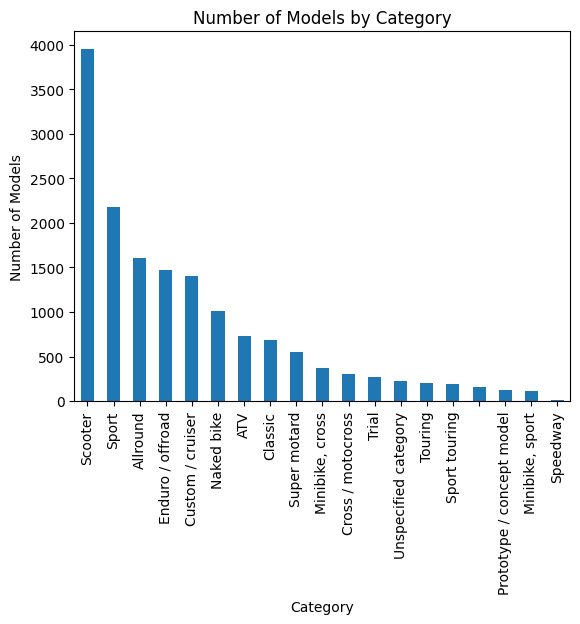

In [181]:
from matplotlib import pyplot as plt
category_counts = df_complete['Category'].value_counts()
category_counts.plot(kind='bar')
plt.title('Number of Models by Category')
plt.xlabel('Category')
plt.ylabel('Number of Models')
plt.show()

In [191]:
import re
def extract_hp(power_str):
    match = re.search(r'(\d+(\.\d+)?)\s*HP', power_str)
    return float(match.group(1)) if match else None
df_complete['HP'] = df_complete['Power'].apply(extract_hp)

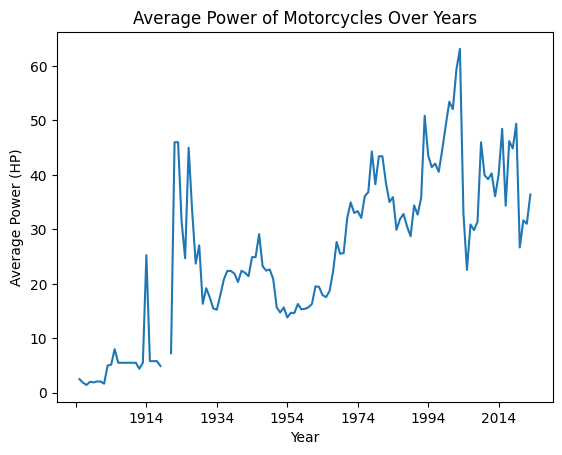

In [210]:
# Yearly trend of average power
yearly_avg_power = df_complete.groupby('Year')['HP'].mean()
yearly_avg_power.plot(kind='line')
plt.title('Average Power of Motorcycles Over Years')
plt.xlabel('Year')
plt.ylabel('Average Power (HP)')
plt.show()

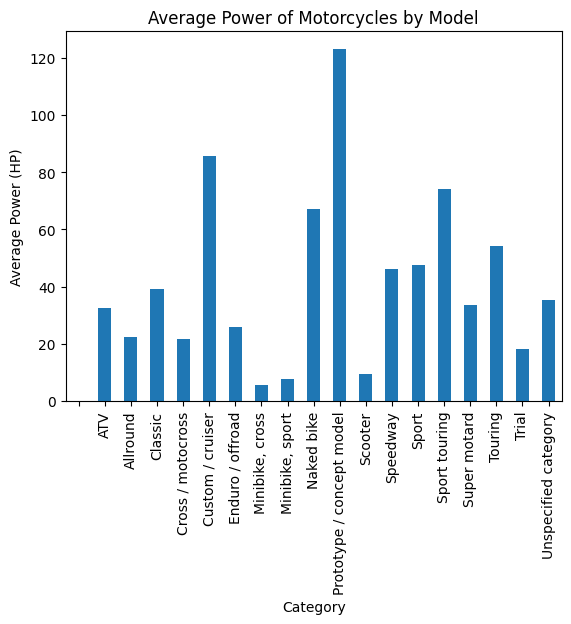

In [212]:
category_avg_power = df_complete.groupby('Category')['HP'].mean()
category_avg_power.plot(kind='bar')
plt.title('Average Power of Motorcycles by Model')
plt.xlabel('Category')
plt.ylabel('Average Power (HP)')
plt.show()

